In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a planet object
planet1=Planet("VENUS")
planet1.h_skip = 150000.0
planet1.h_trap = 20E3

# Load an nominal atmospheric profile with height, temp, pressure, density data
planet1.loadAtmosphereModel('../atmdata/venus-gram-avg.dat', 0 , 1 ,2, 3)

In [3]:
# Set up a vehicle for drag modulation aerocapture and propagate the aerocapture trajectory
vehicle1=Vehicle('SmallSat1', 37, 20, 0.0, 1.767, 0.0, 0.35, planet1)
vehicle1.setInitialState(150.0,-6.22,23.16,10.8191,89.9982,-5.00,0.0,0.0)
vehicle1.setSolverParams(1E-6)
vehicle1.setDragModulationVehicleParams(20, 7.5)

# Set planet.h_low to 10 km, if vehicle dips below this level
# trajctory is terminated.
planet1.h_low=10.0E3

# Set target orbit = 2000 km x 2000 km, tolerance = 20 km
# target apo intentionally set to slightly higher value to account for bias in guidance
vehicle1.setTargetOrbitParams(200.0, 2000.0, 20.0)

# Set entry phase parameters
# v_switch_kms = 2.0, lowAlt_km = 20.0,
# numPoints_lowAlt = 101, hdot_threshold = -200.0 m/s.
# These are somewhat arbitary based on experience.
vehicle1.setDragEntryPhaseParams(2.0, 20.0, 101, -200.0)

# Set beta_1 and beta_ratio
vehicle1.setDragModulationVehicleParams(20, 7.5)

# Set vehicle initial state
vehicle1.setInitialState(150.0,-6.22,23.16,10.8191,89.9982,-5.20,0.0,0.0)
# Propogate a single vehicle trajectory
vehicle1.propogateGuidedEntryD2(1.0,1.0,0.1,2400.0)

In [4]:
vehicle2 = Vehicle('PVenus', 91, 190.0, 0.0, np.pi*0.76**2.0*0.25, 0.0, 0.19, planet1)
vehicle2.setInitialState(150,0.0,0.0,11.5,0.0,-10.0,0.0,0.0)
vehicle2.setSolverParams(1E-6)
vehicle2.propogateEntry (1.0*60, 0.1, 0.0)

In [5]:
vehicle3 = Vehicle('PVenus', 91, 190.0, 0.0, np.pi*0.76**2.0*0.25, 0.0, 0.19, planet1)
vehicle3.setInitialState(150,0.0,0.0,11.5,0.0,-30.0,0.0,0.0)
vehicle3.setSolverParams(1E-6)
vehicle3.propogateEntry (1.0*60, 0.1, 0.0)

In [6]:
from scipy import integrate
heatload_1 = integrate.cumtrapz(vehicle1.q_stag_total_full, vehicle1.t_min_full*60, initial=0)/1e3
heatload_2 = integrate.cumtrapz(vehicle2.q_stag_total, vehicle2.t_minc*60, initial=0)/1e3
heatload_3 = integrate.cumtrapz(vehicle3.q_stag_total, vehicle3.t_minc*60, initial=0)/1e3

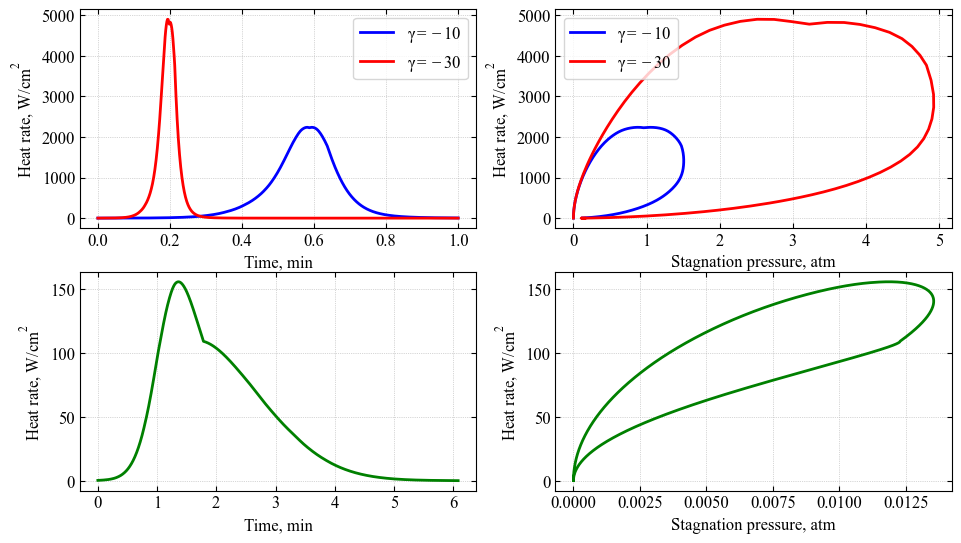

In [7]:
plt.figure(figsize=(11.25, 6.25))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.subplot(2, 2, 1)
plt.plot(vehicle2.t_minc, vehicle2.q_stag_total, 'b-', linewidth=2.0, label=r'$\gamma = -10$')
plt.plot(vehicle3.t_minc, vehicle3.q_stag_total, 'r-', linewidth=2.0, label=r'$\gamma = -30$')

plt.xlabel('Time, min',fontsize=12)
plt.ylabel('Heat rate, '+r'$W/cm^2$',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(2, 2, 2)
plt.plot(vehicle2.stag_pres_atm, vehicle2.q_stag_total, 'b-', linewidth=2.0, label=r'$\gamma = -10$')
plt.plot(vehicle3.stag_pres_atm, vehicle3.q_stag_total, 'r-', linewidth=2.0, label=r'$\gamma = -30$')
plt.xlabel('Stagnation pressure, atm',fontsize=12)
plt.ylabel('Heat rate, '+r'$W/cm^2$',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)
plt.legend(loc='upper left', fontsize=12)

plt.subplot(2, 2, 3)
plt.plot(vehicle1.t_min_full, vehicle1.q_stag_total_full, 'g-', linewidth=2.0)
plt.xlabel('Time, min',fontsize=12)
plt.ylabel('Heat rate, '+r'$W/cm^2$',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.subplot(2, 2, 4)
plt.plot(vehicle1.stag_pres_atm_full, vehicle1.q_stag_total_full, 'g-', linewidth=2.0)
plt.xlabel('Stagnation pressure, atm',fontsize=12)
plt.ylabel('Heat rate, '+r'$W/cm^2$',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)


plt.savefig('../thermal-protection-systems-plots/venus.png', dpi= 300, bbox_inches='tight')
plt.show()

In [8]:
print(f'{round(heatload_1[-1], 2)} kJ/cm2')
print(f'{round(heatload_2[-1], 2)} kJ/cm2')
print(f'{round(heatload_3[-1], 2)} kJ/cm2')

15.94 kJ/cm2
26.61 kJ/cm2
16.86 kJ/cm2
